isnt working 368
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 369
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 370
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 371
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 372
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 373
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 374
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 375
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
isnt working 376
M535.7,49.3c-2,3.5-4,6.9-5.9,10.3V38.5c1.8,2,3.6,3.9,5.4,5.8C536.6,46,536.9,47.2,535.7,49.3z
368
[6.446

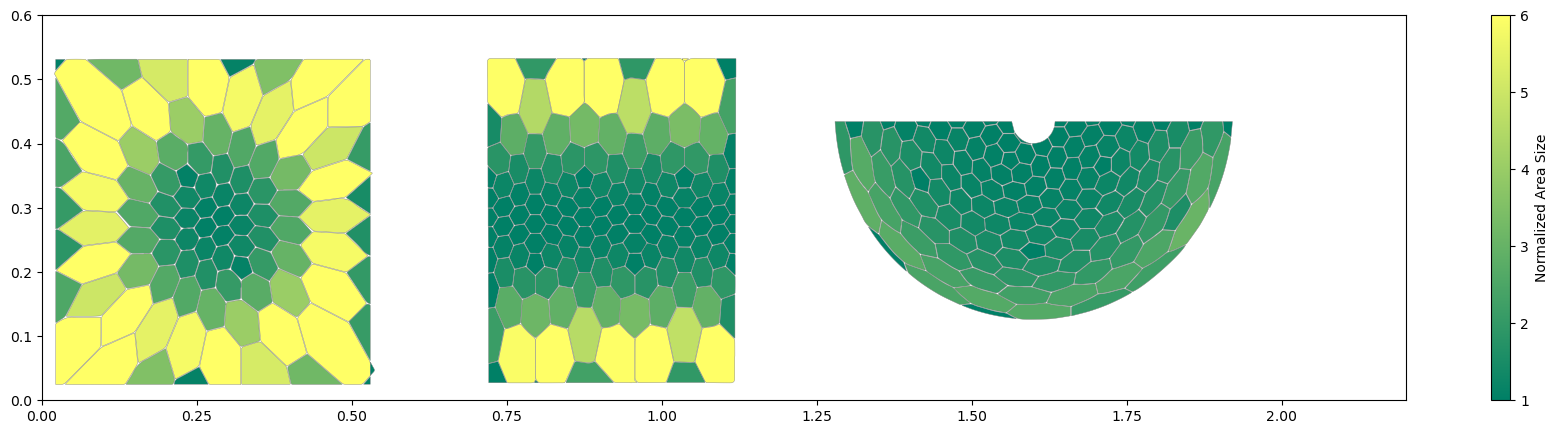

In [1]:


import svg.path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

import matplotlib.cm as cm
from matplotlib.colors import Normalize

cmap = cm.summer
norm = Normalize(vmin=1, vmax=6)

# parse the SVG file
with open("Arena shape compare 3.svg") as f:
    #("New Arena_tiles.svg") as f:

    svg_str = f.read()
    

# extract path data from the SVG string
s = svg_str

#print (s)
start = '" d="' #<path class="st0
end = '"'

#print (s[s.find(start)+len(start):s.rfind(end)])

paths= []
numf = 377


for i in range(numf):
    try:
        s_path = ((s.split(start))[i+1].split(end)[0])
        path_strings = s_path
        #print (i,path_strings)
   
        path = svg.path.parse_path(path_strings)
        paths.append(path)
    except: 
        print("isnt working",i)
        try:
            print(s_path)
        except:
            print("string is empty")
    


#paths #= [svg.path.parse_path(path_string) for path_string in path_strings]
def poly_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


# calculate the area of each path
areas = []

#print(paths)

coords = []
areas = []

fig, ax = plt.subplots(figsize=(22, 5))

pos = np.linspace(0, 1.0, 100)
print(len(paths))
for j in range(len(paths)):
    x = []
    y = []
    for i in range (len(pos)):
        x1 =paths[j].point(pos[i])
        x = np.append(x,x1.real)
        y = np.append(y,x1.imag)
        # calculate the area of each path
    
    coords= np.array([x/1000, y/1000])
    #print(coords.T)
    area = 0.00131*poly_area(x,y)
    areas = np.append(areas,area)
    
    color = area#(4000-area)/4000
    #if (color < 1) & (color > 0.95):
    #    patch = Polygon(coords.T, closed=True,fc =  "gray",ec ="gray",lw = 0.3)
    #else:    
    patch = Polygon(coords.T, closed=True,fc =  cmap(norm(color)),ec ="gray",lw = 0.3)
    
    #print((x,y))
    
    ax.add_patch(patch)
        
    ax.set_ylim(0.0,0.6)
    ax.set_xlim(0.0,2.2)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,label='Normalized Area Size')
    
        #areas.append(area)
print (areas)
#plt.savefig("ArenaFaceplot.svg")

